# Kaggle - Web Traffic Time Series Forecasting

## Model 06 - Convolutional Neural Network

### v0.1 filter size = 3

by Louis Yang

Original model "model_04_neural_network_3_weekday_month"

In [1]:
model_name = 'model_06_CNN_0_initial_1_filter_3'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Input

In [3]:
print('%%% Reading data train_1.csv ... ', end = '', flush = True)
input_df = pd.read_csv("../data/train_1.csv")
print('done!')

%%% Reading data train_1.csv ... done!


In [4]:
input_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [5]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


## Processing Data
Generate training set and test (predict) set

### Day of week alignment

In [6]:
from datetime import datetime
def weekday(datestr):
    return datetime.strptime(datestr,'%Y-%m-%d').weekday()
def daydiff(dstr1,dstr2):
    return datetime.strptime(dstr1,'%Y-%m-%d') - datetime.strptime(dstr2,'%Y-%m-%d') 

We need to predict output (Y_output_pred) start from Sunday (6) for data set 1. (0: Monday, 6: Sunday)

In [7]:
# We take the x_length + y_length days of data only
# This part then split into x_length as input X and y_length as output Y
x_length = 63  # input period
y_length = 63  # predict period

In [8]:
X_input_first_day = input_df.columns[-x_length-364]
X_input_final_day = input_df.columns[-1-364]
X_input_first_day, X_input_final_day

('2015-11-01', '2016-01-02')

In [9]:
daydiff(X_input_first_day, X_input_final_day)

datetime.timedelta(-62)

In [10]:
X_output_first_day = input_df.columns[-x_length]
X_output_final_day = input_df.columns[-1]
X_output_first_day, X_output_final_day

('2016-10-30', '2016-12-31')

In [11]:
daydiff(X_output_first_day, X_output_final_day)

datetime.timedelta(-62)

In [12]:
weekday(X_input_first_day), weekday(X_output_first_day)

(6, 6)

Both are Wednesday (2).

In [13]:
Y_output_first_day = '2017-01-01'; Y_output_final_day = '2017-03-01'
daydiff(Y_output_first_day,Y_output_final_day)

datetime.timedelta(-59)

In [14]:
Y_input_first_day = input_df.columns[-364]
Y_input_final_day = input_df.columns[-1-364+y_length]
Y_input_first_day, Y_input_final_day

('2016-01-03', '2016-03-05')

In [15]:
daydiff(Y_input_first_day, Y_input_final_day)

datetime.timedelta(-62)

In [16]:
weekday(Y_input_first_day), weekday(Y_output_first_day)

(6, 6)

Both are Sunday (6).

### Data range reduce
Select x_length + y_length days of data as training set

where x_length = 60, y_length = 60 by default for training set 1.

input_df = input_df[['Page']+list(input_df.columns[-x_length-y_length-day_shift:])]

input_df

input_df.info()

In [17]:
X_input_first_day, Y_input_final_day

('2015-11-01', '2016-03-05')

input_data contains X_input and Y_input array

In [18]:
input_date_range = input_df.columns[-x_length-364:-364+y_length]; input_date_range

Index(['2015-11-01', '2015-11-02', '2015-11-03', '2015-11-04', '2015-11-05',
       '2015-11-06', '2015-11-07', '2015-11-08', '2015-11-09', '2015-11-10',
       ...
       '2016-02-25', '2016-02-26', '2016-02-27', '2016-02-28', '2016-02-29',
       '2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05'],
      dtype='object', length=126)

In [19]:
input_data = input_df[input_date_range].values; input_data

array([[ 24.,   6.,   6., ...,  15.,   5.,  21.],
       [ 11.,  14.,  14., ...,  26.,  16.,  16.],
       [  6.,   2.,   5., ...,   1.,   4.,   7.],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [20]:
input_data_num = np.nan_to_num(input_data); input_data_num

array([[ 24.,   6.,   6., ...,  15.,   5.,  21.],
       [ 11.,  14.,  14., ...,  26.,  16.,  16.],
       [  6.,   2.,   5., ...,   1.,   4.,   7.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [21]:
input_data_num.shape

(145063, 126)

In [22]:
X_output_first_day, X_output_final_day

('2016-10-30', '2016-12-31')

output_data contains only X_output

In [23]:
output_date_range = input_df.columns[-x_length:]; output_date_range

Index(['2016-10-30', '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03',
       '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07', '2016-11-08',
       '2016-11-09', '2016-11-10', '2016-11-11', '2016-11-12', '2016-11-13',
       '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18',
       '2016-11-19', '2016-11-20', '2016-11-21', '2016-11-22', '2016-11-23',
       '2016-11-24', '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
       '2016-11-29', '2016-11-30', '2016-12-01', '2016-12-02', '2016-12-03',
       '2016-12-04', '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08',
       '2016-12-09', '2016-12-10', '2016-12-11', '2016-12-12', '2016-12-13',
       '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-17', '2016-12-18',
       '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
       '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
       '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object')

In [24]:
output_data = input_df[output_date_range].values; output_data

array([[ 50.,  16.,  30., ...,  19.,  18.,  20.],
       [ 15.,  24.,  13., ...,  45.,  26.,  20.],
       [  2.,   6.,   1., ...,   3.,   4.,  17.],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [25]:
output_data_num = np.nan_to_num(output_data); output_data_num

array([[ 50.,  16.,  30., ...,  19.,  18.,  20.],
       [ 15.,  24.,  13., ...,  45.,  26.,  20.],
       [  2.,   6.,   1., ...,   3.,   4.,  17.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [26]:
output_data_num.shape

(145063, 63)

### View

In [27]:
def view(x, xlim=None, ylim=None, yscale='linear'):
    plt.yscale(yscale)
    plt.plot(x)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.show()
def examine(X, view_n=5):
    '''randomly show some example in feature and label'''
    n_X = len(X)
    view_list = np.random.choice(n_X, min(view_n, n_X), replace=False)
    for i in view_list:
        view(X[i])
        print('i = ',i)

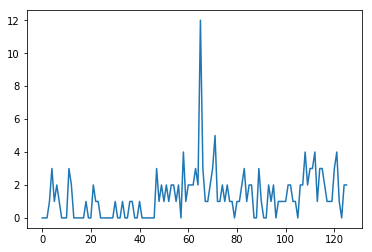

i =  14785


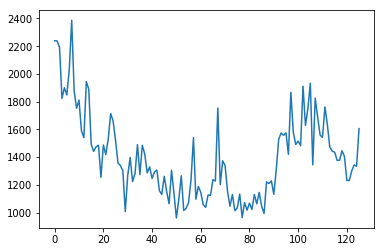

i =  123248


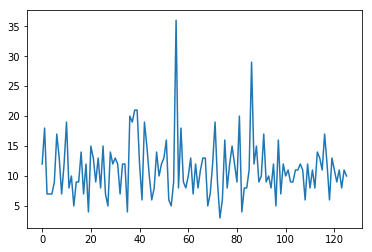

i =  130058


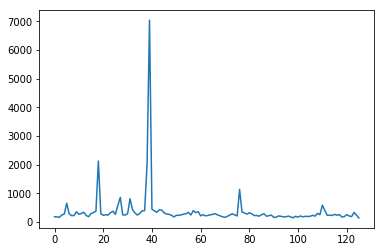

i =  85782


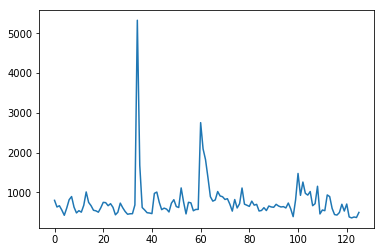

i =  60576


In [28]:
examine(input_data)

### Log

In [29]:
def log(X):
    return np.log10(X + 1.0)
def unlog(X):
    return np.clip(np.power(10., X) - 1.0, 0.0, None)

In [30]:
input_data_log = log(input_data_num); input_data_log

array([[ 1.39794001,  0.84509804,  0.84509804, ...,  1.20411998,
         0.77815125,  1.34242268],
       [ 1.07918125,  1.17609126,  1.17609126, ...,  1.43136376,
         1.23044892,  1.23044892],
       [ 0.84509804,  0.47712125,  0.77815125, ...,  0.30103   ,
         0.69897   ,  0.90308999],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [31]:
input_data_log.shape, input_data.shape

((145063, 126), (145063, 126))

In [32]:
output_data_log = log(output_data_num); output_data_log

array([[ 1.70757018,  1.23044892,  1.49136169, ...,  1.30103   ,
         1.2787536 ,  1.32221929],
       [ 1.20411998,  1.39794001,  1.14612804, ...,  1.66275783,
         1.43136376,  1.32221929],
       [ 0.47712125,  0.84509804,  0.30103   , ...,  0.60205999,
         0.69897   ,  1.25527251],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
output_data_log.shape, output_data.shape

((145063, 63), (145063, 63))

In [34]:
# Check inverse log transformation
input_data_log_tt = unlog(input_data_log)
input_data_log_tt_dif = input_data_log_tt - input_data_num
input_data_log_tt_dif.min(), input_data_log_tt_dif.max()

(-1.862645149230957e-08, 1.862645149230957e-08)

In [35]:
# Check inverse log transformation
output_data_log_tt = unlog(output_data_log)
output_data_log_tt_dif = output_data_log_tt - output_data_num
output_data_log_tt_dif.min(), output_data_log_tt_dif.max()

(-2.6077032089233398e-08, 2.6077032089233398e-08)

### Normalization (Shift and Scale)

In [36]:
input_center = np.nanmedian(input_data_log, axis=-1).reshape(-1,1)
input_center  # remember sample-wised center

array([[ 1.21728445],
       [ 1.17609126],
       [ 0.60205999],
       ..., 
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [37]:
input_scale = np.nanstd(input_data_log, axis=-1).reshape(-1,1)
input_scale[input_scale == 0.0] = 1.0  # Prevent divid by zero
input_scale  # remember sample-wised scale

array([[ 0.23960537],
       [ 0.24001106],
       [ 0.20995463],
       ..., 
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [38]:
output_center = np.nanmedian(output_data_log, axis=-1).reshape(-1,1)
output_center  # remember sample-wised center

array([[ 1.2787536],
       [ 1.2787536],
       [ 0.69897  ],
       ..., 
       [ 0.       ],
       [ 0.       ],
       [ 0.       ]])

In [39]:
output_scale = np.nanstd(output_data_log, axis=-1).reshape(-1,1)
output_scale[output_scale == 0.0] = 1.0  # Prevent divid by zero
output_scale  # remember sample-wised scale

array([[ 0.25058444],
       [ 0.27659201],
       [ 0.30125919],
       ..., 
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [40]:
# Check if there is any 0. in input_scale
[i for i in range(len(input_scale)) if input_scale[i] == 0.]

[]

In [41]:
def transform(data_ori, center, scale):
    return (data_ori - center) / scale
def untransform(data, center, scale):
    return data * scale + center

In [42]:
# Normalize the input_data and output_data
input_data_norm = transform(input_data_log, input_center, input_scale)
output_data_norm = transform(output_data_log, output_center, output_scale)

In [43]:
def check_nan(X):
    return [x for x in X if np.isnan(x).any()]

In [44]:
check_nan(input_data_norm), check_nan(output_data_norm)  # Check if there is any nan in the input_data

([], [])

In [45]:
# Check inverse scale transformation
input_data_norm_it = untransform(input_data_norm, input_center, input_scale)
input_data_norm_it_dif = input_data_norm_it - input_data_log
input_data_norm_it_dif.min(), input_data_norm_it_dif.max()

(-8.8817841970012523e-16, 8.8817841970012523e-16)

In [46]:
# Check inverse scale transformation
output_data_norm_it = untransform(output_data_norm, output_center, output_scale)
output_data_norm_it_dif = output_data_norm_it - output_data_log
output_data_norm_it_dif.min(), output_data_norm_it_dif.max()

(-8.8817841970012523e-16, 8.8817841970012523e-16)

### Remove the all-nan data

In [47]:
# Not implement yet

### Make (X,Y) pairs data from data set

In [48]:
day_shift = 0

In [49]:
def make_XY(data, x_length=x_length, y_length=y_length, shift=day_shift):
    if shift == 0:
        return data[:, -x_length-y_length:-y_length], data[:, -y_length:]
    else:
        return data[:, -x_length-y_length-shift:-y_length-shift], data[:, -y_length-shift:-shift]

In [50]:
X_input, Y_input = make_XY(input_data_norm)
X_input.shape, Y_input.shape

((145063, 63), (145063, 63))

In [51]:
X_output = output_data_norm[:, -x_length:]
X_output.shape

(145063, 63)

### Split Data into Training and Cross Validation Sets

In [52]:
def make_shuffle_index(n, seed=None):
    shuffle_index = np.array(list(range(n)))
    np.random.seed(seed)  # you can fix the initial seed for comparison purpose
    np.random.shuffle(shuffle_index)
    return shuffle_index

In [53]:
def using(array_ori, index_list):
    #return np.array([array_ori[i] for i in index_list])
    return np.take(array_ori, index_list, axis=0)

In [54]:
# Generate a shuffle list
shuffle_index = make_shuffle_index(len(X_input), seed=123)

Keep 10% of input data as validation set

In [55]:
# Split the index list into training and validation sets
n_val = int(len(X_input) * 0.1)
val_index = shuffle_index[:n_val]
train_index = shuffle_index[n_val:]

In [56]:
# Split the data sets according to the index list
X_train = using(X_input, train_index)
Y_train = using(Y_input, train_index)
X_val = using(X_input, val_index)
Y_val = using(Y_input, val_index)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((130557, 63), (130557, 63), (14506, 63), (14506, 63))

#### Split the untransformed data
Split the untransformed data in the same way for score estimation

In [57]:
train_data_num = using(input_data_num, train_index)
val_data_num = using(input_data_num, val_index)

In [58]:
X_train_ori, Y_train_ori = make_XY(train_data_num)
X_val_ori, Y_val_ori = make_XY(val_data_num)
X_train_ori.shape, Y_train_ori.shape, X_val_ori.shape, Y_val_ori.shape

((130557, 63), (130557, 63), (14506, 63), (14506, 63))

In [59]:
train_center = using(input_center, train_index)
val_center = using(input_center, val_index)
train_scale = using(input_scale, train_index)
val_scale = using(input_scale, val_index)
train_center.shape, val_center.shape, train_scale.shape, val_scale.shape

((130557, 1), (14506, 1), (130557, 1), (14506, 1))

#### Check if the inverse transformation is correct

In [60]:
# Undo transformation
X_train_tt = unlog(untransform(X_train, train_center, train_scale))

In [61]:
X_train_tt_diff = X_train_tt - X_train_ori
X_train_tt_diff.min(), X_train_tt_diff.max()

(-1.862645149230957e-08, 1.862645149230957e-08)

## Neural Network?

In [62]:
from keras.models import Sequential
#from keras.layers import Conv1D
from keras.layers import Dense, Dropout, Flatten
from keras.losses import mean_squared_error
from keras.optimizers import Adam

Using TensorFlow backend.


### SMAPE
Symmetric mean absolute percentage error

https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

In [63]:
import keras.backend as K

def k_smape(y_true, y_pred):
    '''Symmetric mean absolute percentage error for keras metric'''
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true) + K.abs(y_pred),
                                            K.epsilon(),
                                            None))
    return 200. * K.mean(diff, axis=-1)

In [64]:
def smape(y_true, y_pred, axis=None):
    '''Symmetric mean absolute percentage error'''
    diff = np.abs((y_true - y_pred) / 
                  np.clip(np.abs(y_true) + np.abs(y_pred), K.epsilon(),
                          None))
    return 200. * np.mean(diff, axis=axis)

In [65]:
# Benchmark SMAPE on the transformed data
smape(Y_train,X_train), smape(Y_val,X_val), smape(Y_train,Y_train)

(138.94472033221419, 139.12077730550394, 0.0)

In [66]:
# Benchmark SMAPE on the original data
smape(Y_train_ori,X_train_ori), smape(Y_val_ori,X_val_ori), \
smape(Y_train_ori,Y_train_ori)

(54.620234938051645, 54.656050128706212, 0.0)

Doing better than the first two scores are better than simply copy and past the previous result.

### Neural Network Model
With the flavor of convolutional neural network

In [67]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Reshape

In [68]:
layer_0 = Input(shape=(x_length,))

In [69]:
layer_t = Reshape((-1, 1))(layer_0)

In [70]:
layer_0, layer_t

(<tf.Tensor 'input_1:0' shape=(?, 63) dtype=float32>,
 <tf.Tensor 'reshape_1/Reshape:0' shape=(?, 63, 1) dtype=float32>)

layer_t = Conv1D(30, kernel_size=7, activation='relu')(layer_t)

In [71]:
layer_t = Conv1D(60, kernel_size=3, activation='relu')(layer_t)

In [72]:
layer_t = Flatten()(layer_t)

In [73]:
layer_t = Dense(120, activation='relu')(layer_t)

In [74]:
layer_t = Dropout(0.25)(layer_t)

In [75]:
layer_t = Dense(120, activation='relu')(layer_t)
layer_t = Dropout(0.5)(layer_t)
layer_f = Dense(y_length)(layer_t)

In [76]:
model = Model(inputs=layer_0, outputs=layer_f)
model.compile(optimizer='adam',
              loss='mean_squared_error', metrics=[k_smape])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 63)                0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 63, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 61, 60)            240       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3660)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               439320    
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
__________

About 5s for 1 epoch on i5-750 CPU

In [77]:
hist = model.fit(X_train, Y_train, batch_size=128, epochs=20, 
                 validation_data=(X_val, Y_val))

Train on 130557 samples, validate on 14506 samples
Epoch 1/20
130557/130557 [==============================] - 19s - loss: 0.8004 - k_smape: 138.8148 - val_loss: 0.7552 - val_k_smape: 134.6968
Epoch 2/20
130557/130557 [==============================] - 19s - loss: 0.7672 - k_smape: 135.1188 - val_loss: 0.7425 - val_k_smape: 133.3507
Epoch 3/20
130557/130557 [==============================] - 19s - loss: 0.7596 - k_smape: 134.5899 - val_loss: 0.7381 - val_k_smape: 132.4693
Epoch 4/20
130557/130557 [==============================] - 19s - loss: 0.7558 - k_smape: 134.2871 - val_loss: 0.7373 - val_k_smape: 132.7039
Epoch 5/20
130557/130557 [==============================] - 19s - loss: 0.7529 - k_smape: 134.1029 - val_loss: 0.7357 - val_k_smape: 133.2883
Epoch 6/20
130557/130557 [==============================] - 19s - loss: 0.7509 - k_smape: 133.9183 - val_loss: 0.7346 - val_k_smape: 133.5245
Epoch 7/20
130557/130557 [==============================] - 20s - loss: 0.7493 - k_smape: 133.810

In [78]:
model.evaluate(X_val,Y_val)

14272/14506 [============================>.] - ETA: 0s

[0.72419223271122346, 131.5283200390073]

### Training History

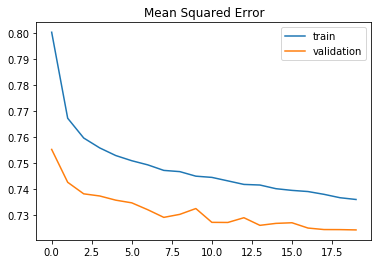

In [79]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Mean Squared Error')
plt.legend(); plt.show()

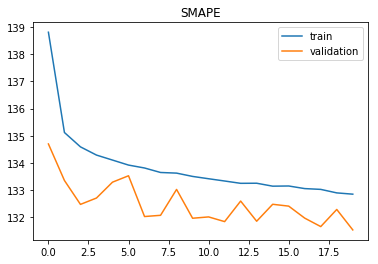

In [80]:
plt.plot(hist.history['k_smape'], label='train')
plt.plot(hist.history['val_k_smape'], label='validation')
plt.title('SMAPE')
plt.legend(); plt.show()

Overfit?

### More Training

In [118]:
hist2 = model.fit(X_train, Y_train, batch_size=128, epochs=5, 
                 validation_data=(X_val, Y_val))

Train on 130557 samples, validate on 14506 samples
Epoch 1/5
130557/130557 [==============================] - 19s - loss: 0.7356 - k_smape: 132.9094 - val_loss: 0.7261 - val_k_smape: 133.3242
Epoch 2/5
130557/130557 [==============================] - 19s - loss: 0.7348 - k_smape: 132.8096 - val_loss: 0.7233 - val_k_smape: 132.5070
Epoch 3/5
130557/130557 [==============================] - 19s - loss: 0.7339 - k_smape: 132.7716 - val_loss: 0.7246 - val_k_smape: 133.0955
Epoch 4/5
130557/130557 [==============================] - 19s - loss: 0.7333 - k_smape: 132.7468 - val_loss: 0.7232 - val_k_smape: 132.2282
Epoch 5/5
130557/130557 [==============================] - 19s - loss: 0.7328 - k_smape: 132.6934 - val_loss: 0.7234 - val_k_smape: 132.6862


In [119]:
model.evaluate(X_val,Y_val)

14208/14506 [============================>.] - ETA: 0s

[0.72335181413116934, 132.6861680863266]

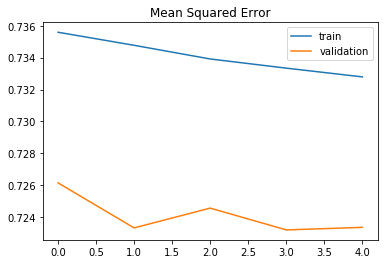

In [120]:
plt.plot(hist2.history['loss'], label='train')
plt.plot(hist2.history['val_loss'], label='validation')
plt.title('Mean Squared Error')
plt.legend(); plt.show()

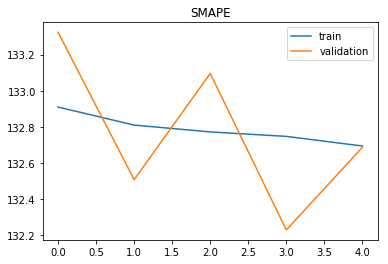

In [121]:
plt.plot(hist2.history['k_smape'], label='train')
plt.plot(hist2.history['val_k_smape'], label='validation')
plt.title('SMAPE')
plt.legend(); plt.show()

### Parameters

In [158]:
model.layers

In [160]:
model.layers[2].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dilation_rate': (1,),
 'filters': 60,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3,),
 'name': 'conv1d_1',
 'padding': 'valid',
 'strides': (1,),
 'trainable': True,
 'use_bias': True}

In [162]:
conv_w = model.layers[2].get_weights()

In [163]:
conv_w[0]

array([[[ -2.34995428e-02,  -1.68362707e-01,   5.84834546e-04,
           1.31251231e-01,  -2.22766519e-01,  -6.58254139e-04,
           1.40732661e-01,   1.00599892e-01,   4.42833565e-02,
           5.96576254e-04,  -7.67850317e-04,  -1.20223701e-01,
           1.45993635e-01,   8.99189040e-02,   1.58712655e-01,
          -1.15599565e-03,   5.96517930e-04,   4.03080776e-04,
           3.45488861e-02,  -1.96035892e-01,   4.54292487e-04,
          -2.50703216e-01,  -2.13027559e-02,   8.71594027e-02,
          -9.52134933e-03,  -2.38152653e-01,  -1.17336735e-01,
           2.31588669e-02,   3.93796450e-04,  -3.11778416e-03,
           2.06604242e-01,   2.96715787e-03,   2.37068199e-02,
          -3.18522424e-01,   1.11427922e-02,   1.61556602e-01,
          -2.90647120e-04,  -1.99678794e-01,   4.15353657e-04,
          -9.02509689e-02,   1.94046690e-04,  -2.16591030e-01,
           8.20614472e-02,   8.22410546e-03,  -4.62144264e-04,
           4.20158356e-02,   5.61822322e-04,   8.047540

In [164]:
conv_w[0].shape

(3, 1, 60)

### Predict for Validation set

In [122]:
Y_val_pred = model.predict(X_val)

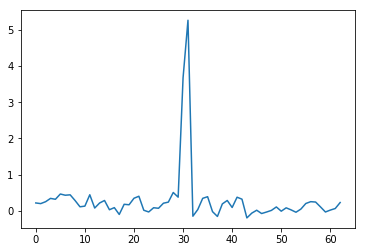

i =  5496


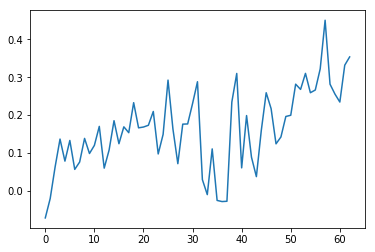

i =  11


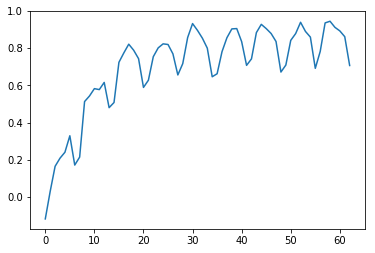

i =  10202


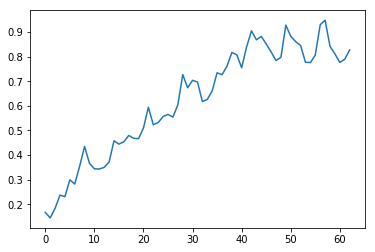

i =  1041


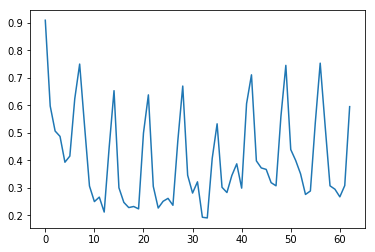

i =  4276


In [123]:
examine(Y_val_pred)

In [124]:
Y_val_pred_ori = unlog(untransform(Y_val_pred, val_center, val_scale))

In [125]:
# SMAPE of the validation set
smape(Y_val_ori, Y_val_pred_ori)

49.639822298435647

In [85]:
def view_val(i):
    plt.plot(Y_val_pred_ori[i])
    plt.plot(Y_val_ori[i])
    plt.plot(X_val_ori[i])
    plt.show()

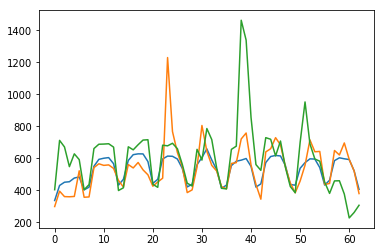

In [126]:
view_val(10)

### Predict for Output Set

In [127]:
Y_output_pred = model.predict(X_output)

In [128]:
Y_output_pred_ori = unlog(untransform(Y_output_pred, 
                                      output_center, output_scale))

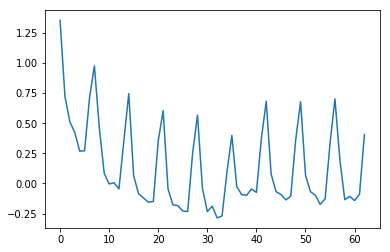

i =  94900


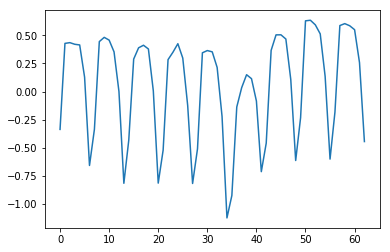

i =  61253


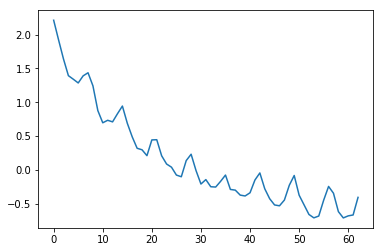

i =  79661


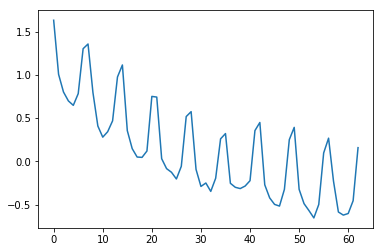

i =  77072


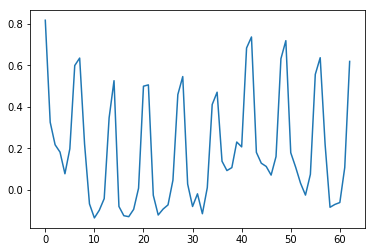

i =  99255


In [129]:
examine(Y_output_pred)

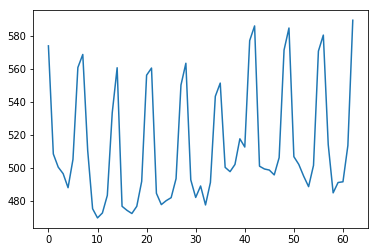

In [130]:
view(Y_output_pred_ori[28450])

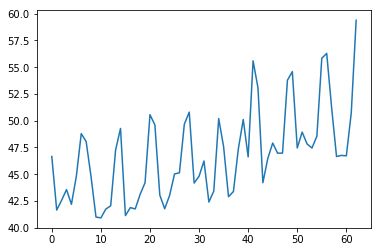

i =  53534


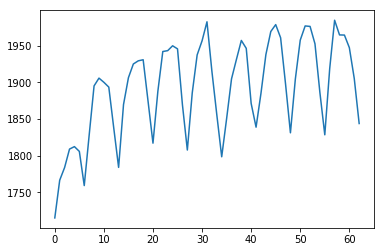

i =  98095


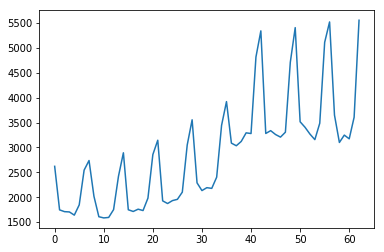

i =  73399


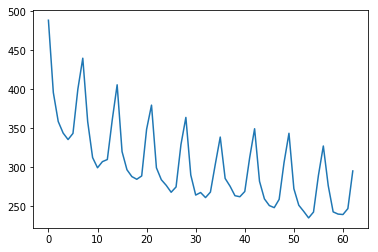

i =  52559


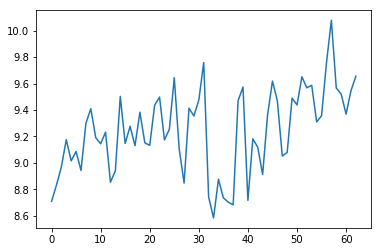

i =  44329


In [131]:
examine(Y_output_pred_ori)

## Output

In [132]:
print('%%% Reading data key_1.csv ...', end = '', flush = True)
output_df = pd.read_csv("../data/key_1.csv")
print('done!')

%%% Reading data key_1.csv ...done!


In [133]:
output_df['date'] = output_df.Page.apply(lambda a: a[-10:])  # take the last 10 characters from 'Page' as date
output_df['Page'] = output_df.Page.apply(lambda a: a[:-11])  # remove the last 10 caharacters from 'Page'
output_df['date'] = output_df['date'].astype('datetime64[ns]')  # convert 'date' string to numpy datetime format
#test['weekday'] = test.date.dt.dayofweek  # find the day of week using the 'date' column
output_df

,Page,Id,date
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05
5,!vote_en.wikipedia.org_all-access_all-agents,48f1e93517a2,2017-01-06
6,!vote_en.wikipedia.org_all-access_all-agents,5def418fcb36,2017-01-07
7,!vote_en.wikipedia.org_all-access_all-agents,77bd08134351,2017-01-08
8,!vote_en.wikipedia.org_all-access_all-agents,5889e6dbb16f,2017-01-09
9,!vote_en.wikipedia.org_all-access_all-agents,5f21fef1d764,2017-01-10


In [134]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703780 entries, 0 to 8703779
Data columns (total 3 columns):
Page    object
Id      object
date    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 199.2+ MB


In [135]:
output_df['date'].values[0:62]  # Make sure the range is 60 days (see if the dates resume after 60)

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
       '2017-01-05T00:00:00.000000000', '2017-01-06T00:00:00.000000000',
       '2017-01-07T00:00:00.000000000', '2017-01-08T00:00:00.000000000',
       '2017-01-09T00:00:00.000000000', '2017-01-10T00:00:00.000000000',
       '2017-01-11T00:00:00.000000000', '2017-01-12T00:00:00.000000000',
       '2017-01-13T00:00:00.000000000', '2017-01-14T00:00:00.000000000',
       '2017-01-15T00:00:00.000000000', '2017-01-16T00:00:00.000000000',
       '2017-01-17T00:00:00.000000000', '2017-01-18T00:00:00.000000000',
       '2017-01-19T00:00:00.000000000', '2017-01-20T00:00:00.000000000',
       '2017-01-21T00:00:00.000000000', '2017-01-22T00:00:00.000000000',
       '2017-01-23T00:00:00.000000000', '2017-01-24T00:00:00.000000000',
       '2017-01-25T00:00:00.000000000', '2017-01-26T00:00:00.000000000',
       '2017-01-27T00:00:00.000000000', '2017-01-28

In [136]:
predict_dates_index=pd.date_range(Y_output_first_day, 
                                  periods=np.timedelta64(y_length,'D'), 
                                  freq = 'D', unit = 'D')
predict_dates_index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
      

In [137]:
result_df = pd.DataFrame(Y_output_pred_ori, columns = predict_dates_index)
result_df

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-02-23 00:00:00,2017-02-24 00:00:00,2017-02-25 00:00:00,2017-02-26 00:00:00,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00,2017-03-02 00:00:00,2017-03-03 00:00:00,2017-03-04 00:00:00
0,20.621000,19.562790,19.179652,19.754690,18.841881,18.528608,18.721610,21.704808,20.474355,19.593470,...,19.680628,18.290369,18.585745,22.176333,22.084087,20.027021,20.106073,19.318493,19.272123,19.792112
1,21.430225,24.395385,24.467302,24.379189,23.577843,23.182363,19.756246,19.782597,22.870066,22.148191,...,20.781894,19.997518,18.149627,18.796324,22.313632,21.069773,20.350793,20.424469,20.512378,18.878990
2,5.036097,5.966825,5.870592,5.817009,5.588344,5.206164,4.136244,4.648727,5.596221,5.314748,...,4.847676,4.346244,3.678438,4.333654,5.441624,5.048448,4.917894,4.844272,4.628220,3.956467
3,17.260248,15.393344,15.208194,15.446571,14.923619,15.461382,16.892220,17.596703,15.967020,14.736927,...,15.025595,15.194381,17.022645,18.039753,16.689081,15.135365,15.036749,14.890475,15.629830,17.754037
4,10.784428,11.368601,11.615287,11.942549,11.523392,11.588290,10.908050,11.054856,11.769590,11.429580,...,11.477006,11.118824,10.885452,11.353499,12.460856,11.424389,11.152640,11.079951,11.474894,11.430265
5,28.476970,24.307150,23.231579,22.968723,22.249050,22.980445,25.468450,26.519955,22.970122,20.865841,...,19.189340,19.691022,22.630957,24.255441,21.933511,19.548299,19.312333,19.284352,20.299331,23.538338
6,7.566678,8.742485,8.887912,8.943076,8.814042,8.524307,7.218751,7.887288,9.094786,8.990767,...,8.779250,8.008414,7.074316,7.850794,9.362114,8.876354,8.791912,8.664768,8.486704,7.512254
7,47.672507,44.379672,44.544770,45.344653,43.736306,44.978126,47.151394,49.526388,46.933265,43.807633,...,45.364719,44.570644,48.646717,51.358035,49.611919,45.097239,45.027150,44.297252,46.668958,51.589889
8,50.232102,43.121047,40.116852,39.974813,37.950319,38.063470,41.633388,46.593250,40.589302,37.046988,...,34.945883,34.539090,38.199206,44.159790,40.540972,35.766428,35.403534,34.769323,35.590447,39.970134
9,30.730475,33.408394,32.984355,32.248483,31.446686,30.441082,27.577406,27.493629,30.102400,29.433335,...,26.661720,25.887697,24.099507,24.770861,27.556649,26.739024,26.244673,26.256806,26.208970,24.707778


In [138]:
result_df['Page'] = input_df['Page']  # Append 'Page' column from input_df
result_df

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-02-24 00:00:00,2017-02-25 00:00:00,2017-02-26 00:00:00,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00,2017-03-02 00:00:00,2017-03-03 00:00:00,2017-03-04 00:00:00,Page
0,20.621000,19.562790,19.179652,19.754690,18.841881,18.528608,18.721610,21.704808,20.474355,19.593470,...,18.290369,18.585745,22.176333,22.084087,20.027021,20.106073,19.318493,19.272123,19.792112,2NE1_zh.wikipedia.org_all-access_spider
1,21.430225,24.395385,24.467302,24.379189,23.577843,23.182363,19.756246,19.782597,22.870066,22.148191,...,19.997518,18.149627,18.796324,22.313632,21.069773,20.350793,20.424469,20.512378,18.878990,2PM_zh.wikipedia.org_all-access_spider
2,5.036097,5.966825,5.870592,5.817009,5.588344,5.206164,4.136244,4.648727,5.596221,5.314748,...,4.346244,3.678438,4.333654,5.441624,5.048448,4.917894,4.844272,4.628220,3.956467,3C_zh.wikipedia.org_all-access_spider
3,17.260248,15.393344,15.208194,15.446571,14.923619,15.461382,16.892220,17.596703,15.967020,14.736927,...,15.194381,17.022645,18.039753,16.689081,15.135365,15.036749,14.890475,15.629830,17.754037,4minute_zh.wikipedia.org_all-access_spider
4,10.784428,11.368601,11.615287,11.942549,11.523392,11.588290,10.908050,11.054856,11.769590,11.429580,...,11.118824,10.885452,11.353499,12.460856,11.424389,11.152640,11.079951,11.474894,11.430265,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5,28.476970,24.307150,23.231579,22.968723,22.249050,22.980445,25.468450,26.519955,22.970122,20.865841,...,19.691022,22.630957,24.255441,21.933511,19.548299,19.312333,19.284352,20.299331,23.538338,5566_zh.wikipedia.org_all-access_spider
6,7.566678,8.742485,8.887912,8.943076,8.814042,8.524307,7.218751,7.887288,9.094786,8.990767,...,8.008414,7.074316,7.850794,9.362114,8.876354,8.791912,8.664768,8.486704,7.512254,91Days_zh.wikipedia.org_all-access_spider
7,47.672507,44.379672,44.544770,45.344653,43.736306,44.978126,47.151394,49.526388,46.933265,43.807633,...,44.570644,48.646717,51.358035,49.611919,45.097239,45.027150,44.297252,46.668958,51.589889,A'N'D_zh.wikipedia.org_all-access_spider
8,50.232102,43.121047,40.116852,39.974813,37.950319,38.063470,41.633388,46.593250,40.589302,37.046988,...,34.539090,38.199206,44.159790,40.540972,35.766428,35.403534,34.769323,35.590447,39.970134,AKB48_zh.wikipedia.org_all-access_spider
9,30.730475,33.408394,32.984355,32.248483,31.446686,30.441082,27.577406,27.493629,30.102400,29.433335,...,25.887697,24.099507,24.770861,27.556649,26.739024,26.244673,26.256806,26.208970,24.707778,ASCII_zh.wikipedia.org_all-access_spider


In [139]:
result_flat_df = pd.melt(result_df, id_vars='Page', var_name='date',
                         value_name='Visits')
result_flat_df

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2017-01-01,20.621000
1,2PM_zh.wikipedia.org_all-access_spider,2017-01-01,21.430225
2,3C_zh.wikipedia.org_all-access_spider,2017-01-01,5.036097
3,4minute_zh.wikipedia.org_all-access_spider,2017-01-01,17.260248
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2017-01-01,10.784428
5,5566_zh.wikipedia.org_all-access_spider,2017-01-01,28.476970
6,91Days_zh.wikipedia.org_all-access_spider,2017-01-01,7.566678
7,A'N'D_zh.wikipedia.org_all-access_spider,2017-01-01,47.672507
8,AKB48_zh.wikipedia.org_all-access_spider,2017-01-01,50.232102
9,ASCII_zh.wikipedia.org_all-access_spider,2017-01-01,30.730475


In [140]:
output_df = output_df.merge(result_flat_df, how='left')  # fill the 'Visits" from result
output_df

,Page,Id,date,Visits
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01,2.421711
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02,2.622911
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03,2.749659
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04,2.895524
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05,2.850287
5,!vote_en.wikipedia.org_all-access_all-agents,48f1e93517a2,2017-01-06,2.901386
6,!vote_en.wikipedia.org_all-access_all-agents,5def418fcb36,2017-01-07,2.657324
7,!vote_en.wikipedia.org_all-access_all-agents,77bd08134351,2017-01-08,2.774253
8,!vote_en.wikipedia.org_all-access_all-agents,5889e6dbb16f,2017-01-09,3.058413
9,!vote_en.wikipedia.org_all-access_all-agents,5f21fef1d764,2017-01-10,2.978926


In [141]:
# Check if there is null value
output_df.loc[output_df.Visits.isnull(), 'Visits']

Series([], Name: Visits, dtype: float64)

In [142]:
# output_df.loc[output_df.Visits.isnull(), 'Visits'] = 0.0  # Uncommend this line to Replace NaN with 0.0

In [143]:
print('%%% Writing result for ' + model_name + ' ...', 
      end = '', flush = True)
# Write only the 'Id' and 'Visits' to the result file
output_df[['Id','Visits']].to_csv('../results/submit_1_' + model_name
                                + '.csv', index = False)
print('done!')

%%% Writing result for model_06_CNN_0_initial_1_filter_3 ...done!


Kaggle Score: 

[6.0.0] 46.3 [Model 6.0.0 CNN - Conv(60, 7)-FC(120)-Drop(0.25)-FC(120)-Drop(0.5)-Linear, 20 epoches]

[6.1.0] 46.7 [Model 6.1.0 CNN - Conv(30, 7)-Conv(60, 7)-FC(120)-Drop(0.25)-FC(120)-Drop(0.5)-Linear, 20 epoches]

## Compare

In [144]:
Y_input_ori = input_data[:,-y_length:]
X_input_ori = input_data[:,:x_length]
X_output_ori = output_data

In [145]:
def comp_view(x1, x2, title=None, show=True):
    plt.plot(x1)
    plt.plot(x2)
    if title: plt.title(title)
    if show: plt.show()

def comp_examine(data1, data2, view_n=10, view_list=None):
    n_data = len(data1)
    if not data1.shape == data2.shape: print(data1.shape, data2.shape, 'not the same length')
    if not view_list: view_list = np.random.choice(n_data, min(view_n, n_data), replace=False)
    for i in view_list:
        comp_view(data1[i], data2[i], title='i = ' + str(i))
    return list(view_list)

view_list = None

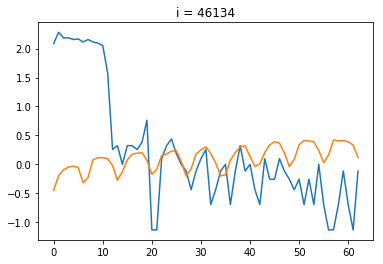

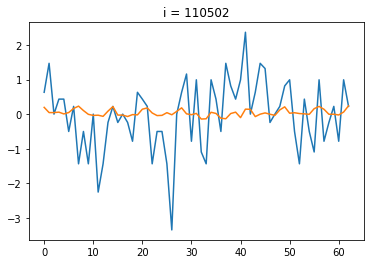

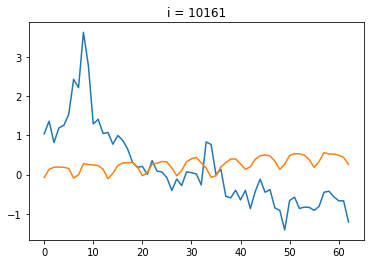

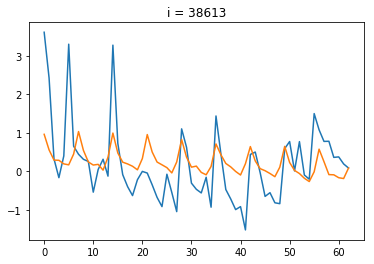

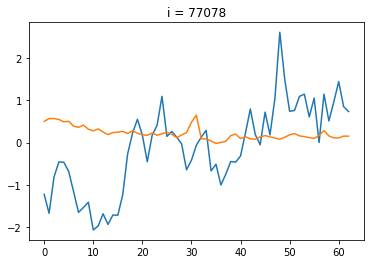

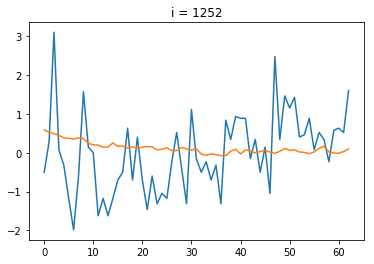

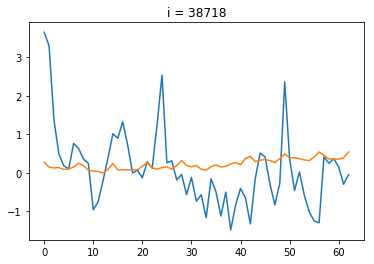

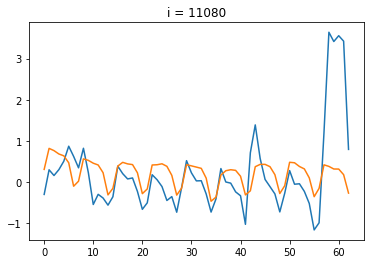

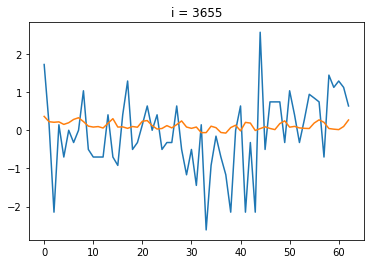

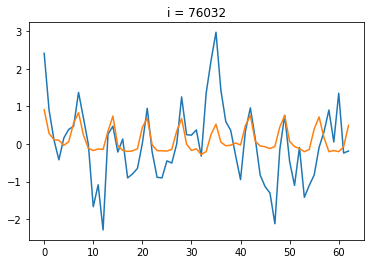

In [146]:
view_list = comp_examine(X_output, Y_output_pred, view_list=view_list)

In [147]:
view_list

[46134, 110502, 10161, 38613, 77078, 1252, 38718, 11080, 3655, 76032]

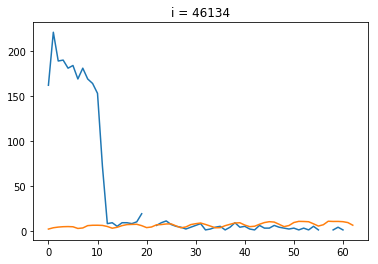

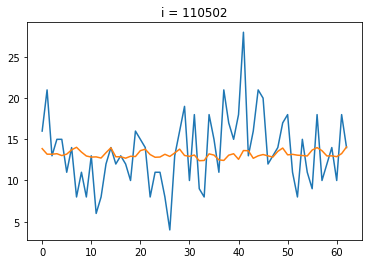

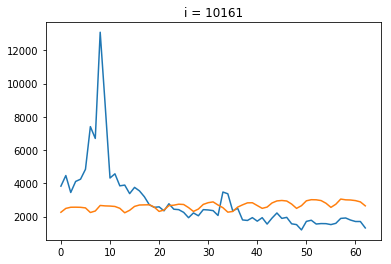

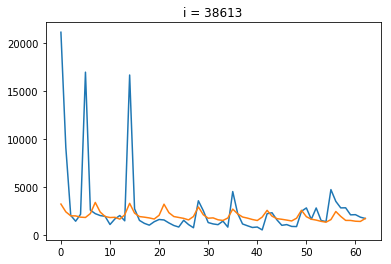

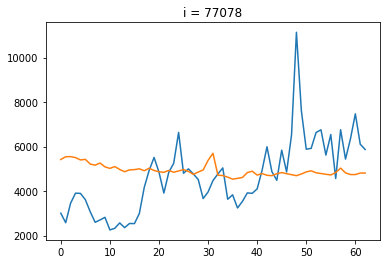

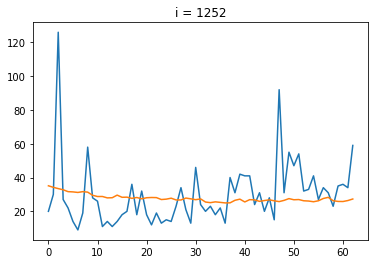

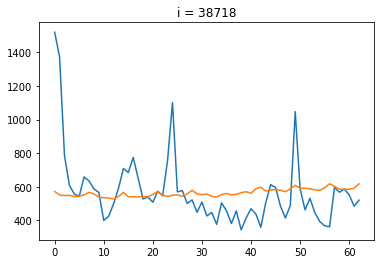

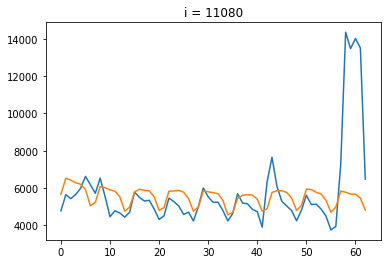

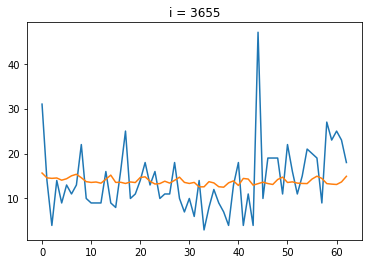

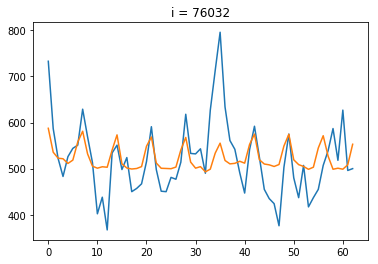

In [148]:
view_list = comp_examine(X_output_ori, Y_output_pred_ori, view_list=view_list)

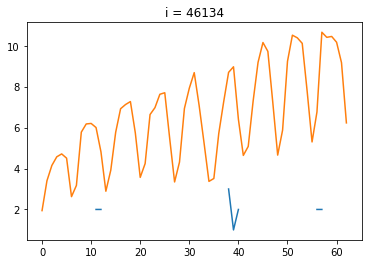

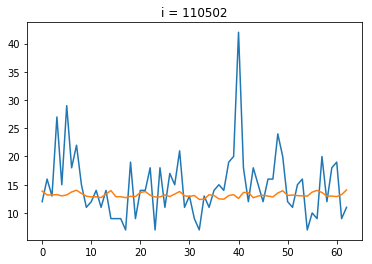

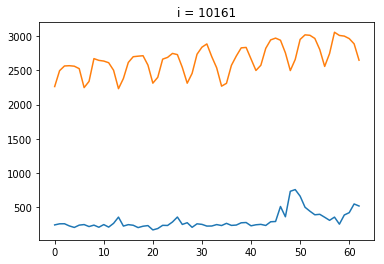

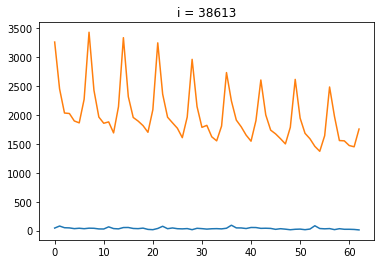

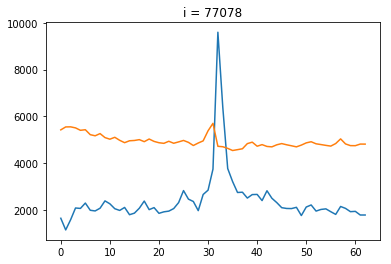

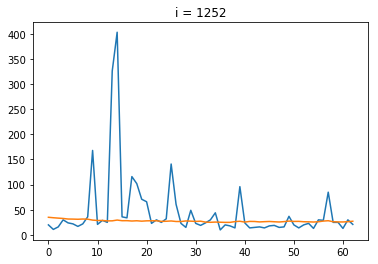

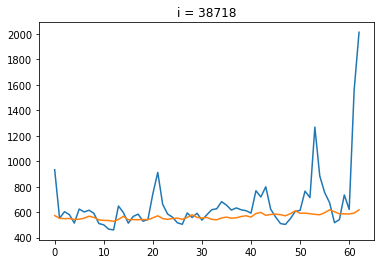

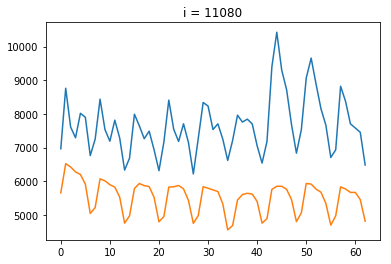

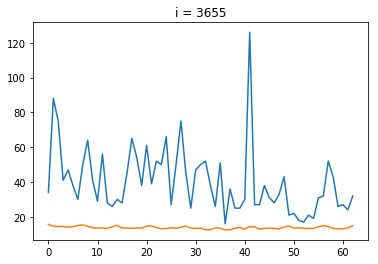

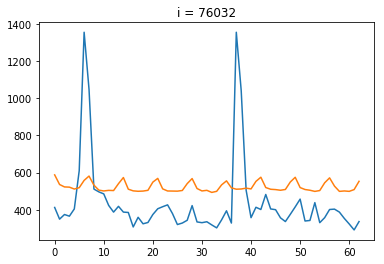

In [149]:
view_list = comp_examine(Y_input_ori, Y_output_pred_ori, view_list=view_list)

In [150]:
input_df.iloc[:,-63*2:-63].values

array([[  18.,   26.,    8., ...,   20.,   12.,   19.],
       [  25.,   22.,  144., ...,   21.,   27.,   33.],
       [   3.,    5.,    4., ...,    3.,    3.,    2.],
       ..., 
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

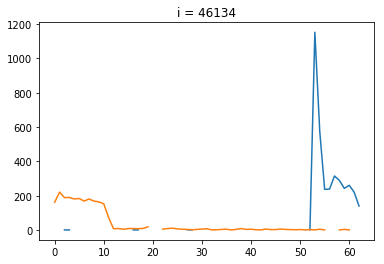

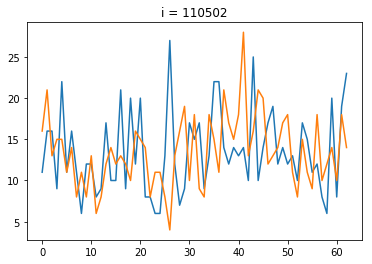

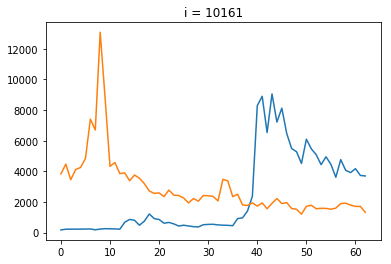

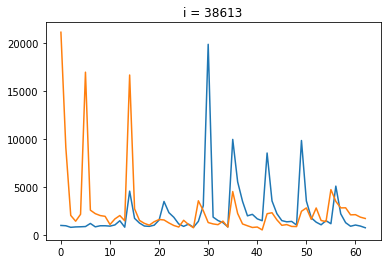

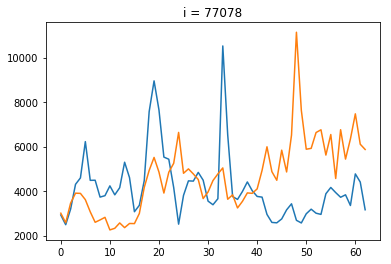

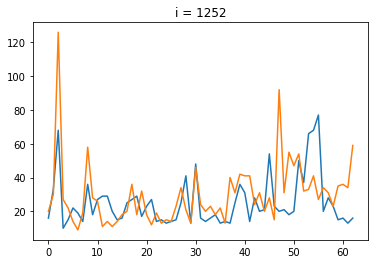

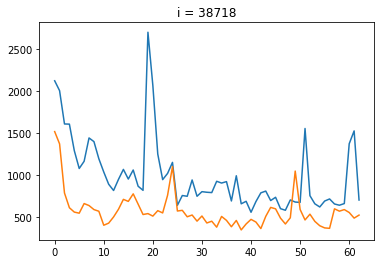

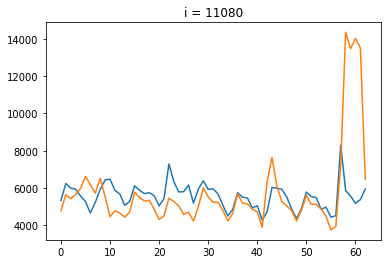

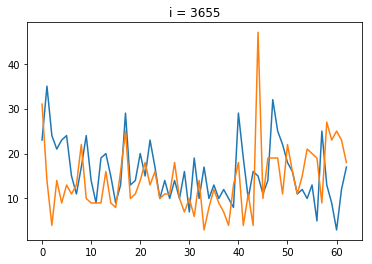

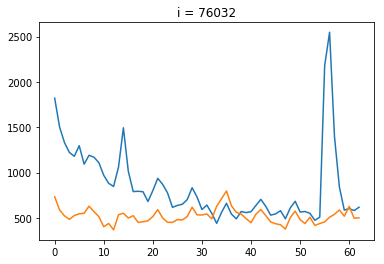

[46134, 110502, 10161, 38613, 77078, 1252, 38718, 11080, 3655, 76032]

In [151]:
comp_examine(input_df.iloc[:,-63*2:-63].values,input_df.iloc[:,-63:].values, view_list=view_list)

#### Case 143557

In [152]:
i = 143557

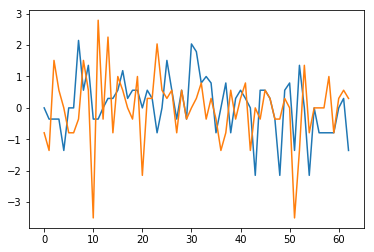

In [153]:
comp_view(X_input[i], Y_input[i])

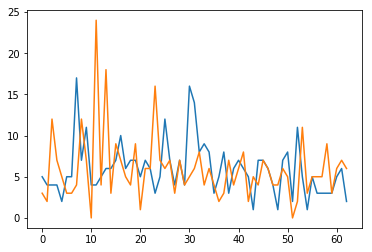

In [154]:
comp_view(X_input_ori[i], Y_input_ori[i])

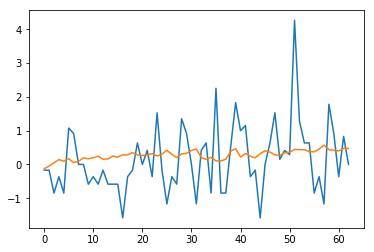

In [155]:
comp_view(X_output[i], Y_output_pred[i])

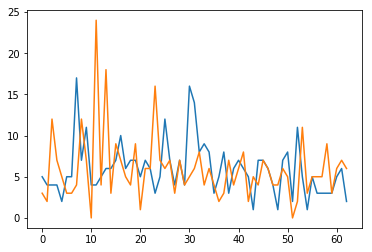

In [156]:
comp_view(X_input_ori[i], Y_input_ori[i])

In [157]:
input_center[i], output_center[i], input_scale[i], output_scale[i]

(array([ 0.77815125]),
 array([ 0.95424251]),
 array([ 0.22199875]),
 array([ 0.30145526]))